##### Imports 

In [1]:
import pandas as pd
import csv
import logging
from mephys_funcs import read_file, merge_dataframes, filter_date, drop_cols, drop_nans, \
create_cond_df, create_container_df

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(context = "notebook", style = "ticks", font="verdana", font_scale = 1.35)

##### Pandas Display Settings

In [2]:
pd.set_option("display.max_colwidth",150) #Expands the number of characters shown in the columns
pd.set_option('display.max_columns', None)

##### Lists/Paths

In [3]:
fields_jem = ["date", "organism_name", "name", "container", "rigOperator",
              "status", "roi_major", "roi_minor",
              "extraction.postPatch", "extraction.endPipetteR"]
fields_ephys = ["b'name'", "b'patched_cell_container'", "b'vrest'", "b'sag'", 
                "b'tau'", "b'upstroke_downstroke_ratio_long_square'", 
                "b'latency'", "b'f_i_curve_slope'"]
fields_shiny = ["cell_name", "sample_id", "cluster_label", "broad_class_label",
                "subclass_label", "cell_specimen_project"]


path_jem = "Z:/Patch-Seq/compiled-jem-data/jem_metadata.csv"
path_ephys = "C:/Users/ramr/Documents/Github/analysis_projects/csv/mephys_features.csv"
path_shiny = "//allen/programs/celltypes/workgroups/rnaseqanalysis/shiny/patch_seq/star/mouse_patchseq_VISp_current/mapping.df.with.bp.40.lastmap.csv"


drop_cols_list = ["b'name'", "b'patched_cell_container'", "cell_name", "sample_id"]
drop_nans_list = ["date", "name", "rigOperator"]

r_users = ["kristenh", "lindsayn", "ramr", "katherineb", "jessicat"]

##### Main

In [4]:
def main():
    global merge_all
    jem = read_file(path_jem, fields_jem)
    ephys = read_file(path_ephys, fields_ephys)
    shiny = read_file(path_shiny, fields_shiny)
    merge_je = merge_dataframes(jem, ephys, "name", "b'name'")
    merge_all = merge_dataframes(merge_je, shiny, "name", "cell_name")
    merge_all = filter_date(merge_all, "date")
    merge_all = drop_cols(merge_all, drop_cols_list)
    merge_all = drop_nans(merge_all, drop_nans_list)
    merge_all = create_container_df(merge_all, "container")
    merge_all = create_cond_df(merge_all, "rigOperator", r_users)

In [5]:
if __name__ == "__main__":
    main()

INFO:mephys_funcs:Read file in as a pandas dataframe
INFO:mephys_funcs:Read file in as a pandas dataframe
INFO:mephys_funcs:Read file in as a pandas dataframe
INFO:mephys_funcs:Merged two pandas dataframe into one dataframe
INFO:mephys_funcs:Merged two pandas dataframe into one dataframe
INFO:mephys_funcs:Sorted date to only display 2020 data
INFO:mephys_funcs:Dropped columns: ["b'name'", "b'patched_cell_container'", 'cell_name', 'sample_id']
INFO:mephys_funcs:Dropped NaNs from these columns: ['date', 'name', 'rigOperator']
INFO:mephys_funcs:Created a container_label column to show(ex.'PA')
INFO:mephys_funcs:Created a conditional dataframe based on a list of values


In [6]:
merge_all

,date,organism_name,name,extraction.endPipetteR,extraction.postPatch,rigOperator,status,roi_major,roi_minor,container,b'vrest',b'sag',b'tau',b'upstroke_downstroke_ratio_long_square',b'latency',b'f_i_curve_slope',cluster_label,cell_specimen_project,broad_class_label,subclass_label,container_label
0,2020-01-03 10:40:30 -0800,Mouse,Gad2-IRES-Cre;Ai14-504539.10.01.01,1000.0,nucleus_present,jessicat,SUCCESS,RSPd,layer 2/3,PFS4_200103_701_A01,-65.282120,0.148347,13.020941,3.711103,0.03164,0.149533,L2/3 IT VISp Agmat,mIVSCC-MET,Glutamatergic,L2/3 IT,PF
1,2020-01-03 13:00:07 -0800,Mouse,Pvalb-IRES-Cre;Ai14-504851.11.01.02,2000.0,nucleus_present,jessicat,SUCCESS,RSPv,layer 2/3,PFS4_200103_703_A01,-66.313396,0.269889,10.218081,2.976385,0.04538,0.060000,n15,mIVSCC-MET,Glutamatergic,L4,PF
2,2020-01-03 13:00:07 -0800,Mouse,Pvalb-IRES-Cre;Ai14-504851.11.01.01,1000.0,nucleus_present,jessicat,SUCCESS,RSPd,layer 5,PFS4_200103_702_A01,-88.126678,0.159878,9.964491,2.951999,0.04614,0.024934,L5 PT VISp Lgr5,mIVSCC-MET,Glutamatergic,L5 PT,PF
3,2020-01-06 13:12:44 -0800,Mouse,Vip-IRES-Cre;Ai14-504179.11.01.02,3000.0,nucleus_present,jessicat,SUCCESS,SSp,layer 5,PFS4_200106_702_A01,-68.603827,0.159457,15.867854,2.760209,0.05240,0.089362,n9,mIVSCC-MET,Glutamatergic,L5 PT,PF
4,2020-01-06 13:12:44 -0800,Mouse,Vip-IRES-Cre;Ai14-504179.11.01.01,7.0,nucleus_present,jessicat,SUCCESS,RSPd,layer 5,PFS4_200106_701_A01,-70.997942,0.053066,5.103991,1.318873,0.06372,0.060714,Pvalb Reln Itm2a,mIVSCC-MET,GABAergic,Pvalb,PF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,2020-01-21 11:22:01 -0800,Mouse,Slc17a6-IRES-Cre;Ai14-507004.09.06.01,600.0,nucleus_present,lindsayn,SUCCESS,ORB,layer 5,P8S4_200121_351_A01,-59.954627,0.000106,44.941173,4.456445,0.12254,0.122541,L5 IT VISp Col27a1,mIVSCC-MET,Glutamatergic,L5 IT,P8
155,2020-01-21 12:58:15 -0800,Mouse,Oxtr-T2A-Cre;Ai14-507641.09.02.01,1000.0,nucleus_present,jessicat,SUCCESS,RSPd,layer 2/3,PFS4_200121_701_A01,-72.006762,0.140190,16.807774,2.768703,0.03892,-0.001100,n5,mIVSCC-MET,Glutamatergic,L5 PT,PF
156,2020-01-21 13:27:56 -0800,Mouse,Oxtr-T2A-Cre;Ai14-507641.09.01.01,3700.0,nucleus_present,kristenh,SUCCESS,RSPv,layer 2/3,P1S4_200121_001_A01,-64.972167,0.317131,22.043437,1.956426,0.02966,0.095302,n91,mIVSCC-MET,GABAergic,Sst,P1
157,2020-01-21 13:27:56 -0800,Mouse,Oxtr-T2A-Cre;Ai14-507641.09.01.02,7.0,entire_cell,kristenh,SUCCESS,RSPd,layer 2/3,P1S4_200121_002_A01,-68.910428,0.044417,21.072983,2.063311,0.03910,0.242991,n89,mIVSCC-MET,GABAergic,Sst,P1


In [ ]:
rsp = create_cond_df(merge_all, "roi_major", ["RSPd", "RSPv"])
ssp = create_cond_df(merge_all, "roi_major", ["SSp"])
orb = create_cond_df(merge_all, "roi_major", ["ORB"])
ctxsp = create_cond_df(merge_all, "roi_major", ["CTXsp"])
mo = create_cond_df(merge_all, "roi_major", ["MOp", "MOs"])

##### Paths

In [ ]:
csv_path = "C:/Users/ramr/Documents/Github/analysis_projects/csv/"
excel_path = "C:/Users/ramr/Documents/Github/analysis_projects/excel/"

##### Writing to csv_file

In [ ]:
#jem.to_csv(csv_path + "jem.csv")
#jem_2020.to_csv(csv_path + "jem_2020.csv")

##### Writing to excel_file

In [ ]:
writer = pd.ExcelWriter(excel_path + "new_region.xlsx")
merge_all.to_excel(writer, "All", freeze_panes=(1,0))
rsp.to_excel(writer, "RSP", freeze_panes=(1,0))
ssp.to_excel(writer, "SSP", freeze_panes=(1,0))
orb.to_excel(writer, "ORB", freeze_panes=(1,0))
ctxsp.to_excel(writer, "CTXsp", freeze_panes=(1,0))
mo.to_excel(writer, "MO", freeze_panes=(1,0))
writer.save()

##### Plots

In [10]:
def box_swarm_plt(col_x, col_y, df):
    fig_dims = (20, 10)
    f, axes = plt.subplots(1, 3, figsize=fig_dims)

    sns.boxplot(x=col_x, y=col_y, data=df, palette="Paired", ax=axes[0])
    sns.swarmplot(x=col_x, y=col_y, data=df,  color="0.2", ax=axes[0])
    
    sns.boxplot(x=col_x, y=col_y, data=df, palette="Paired", ax=axes[1])
    sns.swarmplot(x=col_x, y=col_y, data=df,  color="0.2", ax=axes[1])
    
    sns.boxplot(x=col_x, y=col_y, data=df, palette="Paired", ax=axes[2])
    sns.swarmplot(x=col_x, y=col_y, data=df,  color="0.2", ax=axes[2])

C:\Users\ramr\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\ramr\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:1328: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter
C:\Users\ramr\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\ramr\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:1328: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter
C:\Users\ramr\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\ramr\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:1328: RuntimeWar

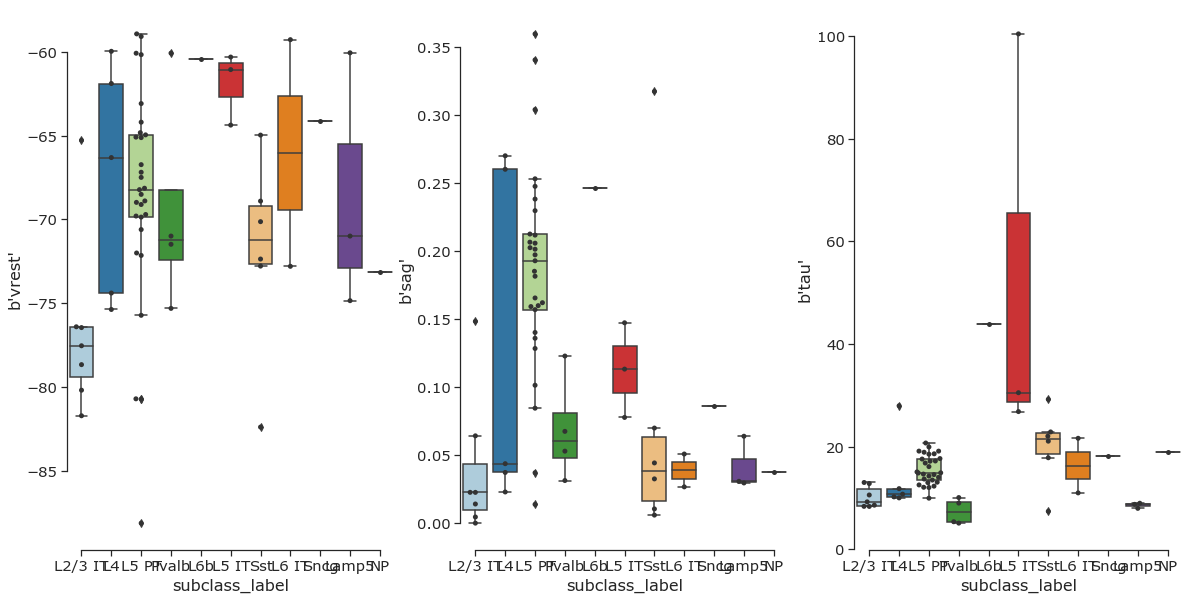

In [11]:
fig_dims = (20, 10)
f, axes = plt.subplots(1, 3, figsize=fig_dims)

sns.boxplot(x="subclass_label",
              y="b'vrest'",
              data=rsp, palette="Paired", ax=axes[0])
sns.swarmplot(x="subclass_label",
              y="b'vrest'",
              data=rsp, color="0.2", ax=axes[0])

sns.boxplot(x="subclass_label",
              y="b'sag'",
              data=rsp, palette="Paired", ax=axes[1])
sns.swarmplot(x="subclass_label",
              y="b'sag'",
              data=rsp, color="0.2", ax=axes[1])

sns.boxplot(x="subclass_label",
              y="b'tau'",
              data=rsp, palette="Paired", ax=axes[2])
sns.swarmplot(x="subclass_label",
              y="b'tau'",
              data=rsp, color="0.2", ax=axes[2])
sns.despine(trim=True, left=False)

C:\Users\ramr\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\ramr\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:1328: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter
C:\Users\ramr\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\ramr\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:1328: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter
C:\Users\ramr\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:1324: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\ramr\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:1328: RuntimeWar

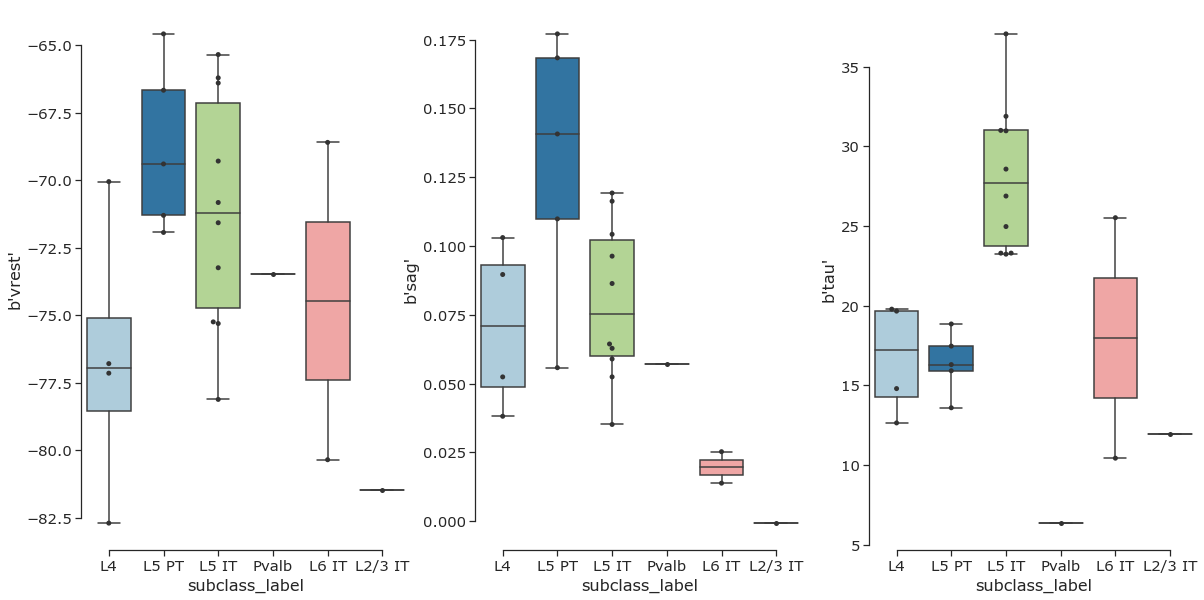

In [12]:
fig_dims = (20, 10)
f, axes = plt.subplots(1, 3, figsize=fig_dims)

sns.boxplot(x="subclass_label",
              y="b'vrest'",
              data=mo, palette="Paired", ax=axes[0])
sns.swarmplot(x="subclass_label",
              y="b'vrest'",
              data=mo, color="0.2", ax=axes[0])

sns.boxplot(x="subclass_label",
              y="b'sag'",
              data=mo, palette="Paired", ax=axes[1])
sns.swarmplot(x="subclass_label",
              y="b'sag'",
              data=mo, color="0.2", ax=axes[1])

sns.boxplot(x="subclass_label",
              y="b'tau'",
              data=mo, palette="Paired", ax=axes[2])
sns.swarmplot(x="subclass_label",
              y="b'tau'",
              data=mo, color="0.2", ax=axes[2])
sns.despine(trim=True, left=False)